In [1]:
import random
import gym
import numpy as np
import collections
from tqdm import tqdm
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
np.bool8 = np.bool_

9 -500
19 -500
29 -500
39 -599
episode: 46/500, score: -200, epsilon: 0.01
episode: 47/500, score: -472, epsilon: 0.01
episode: 48/500, score: -72, epsilon: 0.01
episode: 49/500, score: -95, epsilon: 0.01
episode: 50/500, score: -39, epsilon: 0.01
49 -39
episode: 51/500, score: -101, epsilon: 0.01
episode: 52/500, score: -50, epsilon: 0.01
episode: 53/500, score: -32, epsilon: 0.01
episode: 54/500, score: -17, epsilon: 0.01
episode: 55/500, score: -18, epsilon: 0.01
episode: 56/500, score: -33, epsilon: 0.01
episode: 57/500, score: -20, epsilon: 0.01
episode: 58/500, score: -19, epsilon: 0.01
episode: 59/500, score: -17, epsilon: 0.01
episode: 60/500, score: -21, epsilon: 0.01
59 -21
episode: 61/500, score: -15, epsilon: 0.01
episode: 62/500, score: -20, epsilon: 0.01
episode: 63/500, score: -13, epsilon: 0.01
episode: 64/500, score: -24, epsilon: 0.01
episode: 65/500, score: -13, epsilon: 0.01
episode: 66/500, score: -15, epsilon: 0.01
episode: 67/500, score: -21, epsilon: 0.01
episod

episode: 230/500, score: -15, epsilon: 0.01
229 -15
episode: 231/500, score: -13, epsilon: 0.01
episode: 232/500, score: -15, epsilon: 0.01
episode: 233/500, score: -13, epsilon: 0.01
episode: 234/500, score: -13, epsilon: 0.01
episode: 235/500, score: -15, epsilon: 0.01
episode: 236/500, score: -13, epsilon: 0.01
episode: 237/500, score: -19, epsilon: 0.01
episode: 238/500, score: -14, epsilon: 0.01
episode: 239/500, score: -13, epsilon: 0.01
episode: 240/500, score: -15, epsilon: 0.01
239 -15
episode: 241/500, score: -13, epsilon: 0.01
episode: 242/500, score: -13, epsilon: 0.01
episode: 243/500, score: -13, epsilon: 0.01
episode: 244/500, score: -13, epsilon: 0.01
episode: 245/500, score: -15, epsilon: 0.01
episode: 246/500, score: -15, epsilon: 0.01
episode: 247/500, score: -17, epsilon: 0.01
episode: 248/500, score: -16, epsilon: 0.01
episode: 249/500, score: -15, epsilon: 0.01
episode: 250/500, score: -13, epsilon: 0.01
249 -13
episode: 251/500, score: -13, epsilon: 0.01
episode:

episode: 414/500, score: -13, epsilon: 0.01
episode: 415/500, score: -13, epsilon: 0.01
episode: 416/500, score: -13, epsilon: 0.01
episode: 417/500, score: -15, epsilon: 0.01
episode: 418/500, score: -13, epsilon: 0.01
episode: 419/500, score: -13, epsilon: 0.01
episode: 420/500, score: -17, epsilon: 0.01
419 -17
episode: 421/500, score: -14, epsilon: 0.01
episode: 422/500, score: -15, epsilon: 0.01
episode: 423/500, score: -13, epsilon: 0.01
episode: 424/500, score: -17, epsilon: 0.01
episode: 425/500, score: -15, epsilon: 0.01
episode: 426/500, score: -14, epsilon: 0.01
episode: 427/500, score: -13, epsilon: 0.01
episode: 428/500, score: -15, epsilon: 0.01
episode: 429/500, score: -15, epsilon: 0.01
episode: 430/500, score: -15, epsilon: 0.01
429 -15
episode: 431/500, score: -15, epsilon: 0.01
episode: 432/500, score: -15, epsilon: 0.01
episode: 433/500, score: -19, epsilon: 0.01
episode: 434/500, score: -15, epsilon: 0.01
episode: 435/500, score: -15, epsilon: 0.01
episode: 436/500

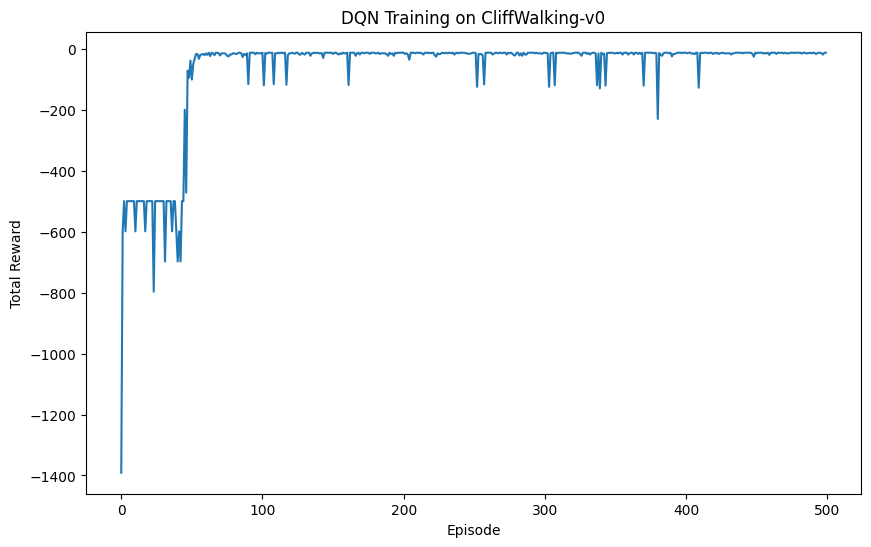

Test episode: 1/5, score: -15
Test episode: 2/5, score: -15
Test episode: 3/5, score: -15
Test episode: 4/5, score: -15
Test episode: 5/5, score: -15


In [4]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# 设置设备（GPU如果可用，否则CPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 折扣因子
        self.epsilon = 1.0   # 探索率
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        
        # 创建Q网络
        self.model = DQN(state_size, action_size).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state, explore=True):
        if explore and np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        state = torch.FloatTensor(state).to(device)
        with torch.no_grad():
            act_values = self.model(state)
        return torch.argmax(act_values).item()
    
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        
        for state, action, reward, next_state, done in minibatch:
            state = torch.FloatTensor(state).to(device)
            next_state = torch.FloatTensor(next_state).to(device)
            
            # 计算目标Q值
            target = reward
            if not done:
                with torch.no_grad():
                    target = reward + self.gamma * torch.max(self.model(next_state)).item()
            
            # 获取当前Q值预测
            current_q = self.model(state)
            target_f = current_q.clone().detach()
            target_f[0][action] = target
            
            # 计算损失并更新模型
            self.optimizer.zero_grad()
            loss = self.criterion(current_q, target_f)
            loss.backward()
            self.optimizer.step()
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
    
    def load(self, name):
        self.model.load_state_dict(torch.load(name))
    
    def save(self, name):
        torch.save(self.model.state_dict(), name)

def preprocess_state(state, state_size):
    """将状态转换为神经网络的输入格式"""
    # 对于CliffWalking，状态是一个整数，我们需要将其转换为one-hot编码
    state_one_hot = np.zeros(state_size)
    state_one_hot[state] = 1
    return np.reshape(state_one_hot, [1, state_size])

def train_dqn(episodes, render=False):
    env = gym.make('CliffWalking-v0')
    state_size = env.observation_space.n  # CliffWalking状态空间大小
    action_size = env.action_space.n      # CliffWalking动作空间大小
    agent = DQNAgent(state_size, action_size)
    batch_size = 32
    
    rewards_history = []
    
    for e in range(episodes):
        state, _ = env.reset()
        state = preprocess_state(state, state_size)
        total_reward = 0
        
        for time in range(500):  # 最多500步
            if render:
                env.render()
            
            action = agent.act(state)
            next_state, reward, done, _, _ = env.step(action)
            next_state = preprocess_state(next_state, state_size)
            
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            
            if done:
                print(f"episode: {e+1}/{episodes}, score: {total_reward}, epsilon: {agent.epsilon:.2f}")
                break
                
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        
        rewards_history.append(total_reward)
        
        # 每100个episode保存一次模型
        if (e + 1) % 10 == 0:
            print(e,rewards_history[-1])
            agent.save(f"cliff_walking_dqn_{e+1}.pt")
    
    return agent, rewards_history

def test_agent(agent, episodes=10, render=True):
    env = gym.make('CliffWalking-v0', render_mode='human' if render else None)
    state_size = env.observation_space.n
    
    for e in range(episodes):
        state, _ = env.reset()
        state = preprocess_state(state, state_size)
        total_reward = 0
        done = False
        
        while not done:
            if render:
                env.render()
            
            action = agent.act(state, explore=False)  # 测试时不探索
            next_state, reward, done, _, _ = env.step(action)
            next_state = preprocess_state(next_state, state_size)
            
            state = next_state
            total_reward += reward
            
            if done:
                print(f"Test episode: {e+1}/{episodes}, score: {total_reward}")
                break

def plot_rewards(rewards):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards)
    plt.title('DQN Training on CliffWalking-v0')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.savefig('cliff_walking_dqn_rewards.png')
    plt.show()

if __name__ == "__main__":
    # 训练智能体
    trained_agent, rewards = train_dqn(episodes=500)
    
    # 绘制奖励历史
    plot_rewards(rewards)
    
    # 保存最终模型
    trained_agent.save("cliff_walking_dqn_final.pt")
    
    # 测试训练好的智能体
    test_agent(trained_agent, episodes=5) 

In [5]:
test_agent(trained_agent, episodes=5) 

Test episode: 1/5, score: -15
Test episode: 2/5, score: -15
Test episode: 3/5, score: -15
Test episode: 4/5, score: -15
Test episode: 5/5, score: -15
